In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect("host='192.168.178.78'  dbname='prothesen'  user='postgres' password='postgres' ")

In [3]:
cur = conn.cursor()

In [4]:
cur.execute("select * from prothesen where opdatum >='2022-01-01' and opdatum < '2022-12-31';")

In [5]:
read = cur.fetchall()

In [6]:
cnames = ["id", "patientennummer", "prothesenart", "prothesentyp", "proximal", "distal", "seite", "wechseleingriff",
          "praeop_roentgen", "postop_roentgen", "fraktur", "planung", "opdatum", "operateur", "assistenz", "op_zeiten",
          "infektion", "luxation", "inklinationswinkel", "trochanterabriss", "fissuren", "thrombose_embolie",
          "sterblichkeit", "neurologie", "dokumentation", "memo", "knochenverankert", "periprothetisch",
          "reintervention", "abweichung", "ct", "ab_imp_art", "ab_imp_groesse", "ab_stab", "ab_blutung", "ab_praeop",
          "ab_operation", "ab_anaesthesie", "spaet_infekt", "einweiser", "neunzig_tage", "kniewinkel_prae",
          "kniewinkel_post", "vierundzwanzig_plus", "oak"]

In [7]:
df = pd.DataFrame(read, columns=cnames)

In [8]:
knie_p = df[(df['prothesenart'] == 'Knie') & (df['wechseleingriff'] == False)]

In [9]:
knie_p['id'].count()

167

In [10]:
knie_p.groupby('infektion').size()

infektion
False    167
dtype: int64

In [11]:
knie_p.groupby((knie_p['kniewinkel_post'] > 3) | (knie_p['kniewinkel_post'] < -3)).size()

kniewinkel_post
False    164
True       3
dtype: int64

In [12]:
knie_p.groupby('fissuren').size()

fissuren
False    167
dtype: int64

In [13]:
def runden(zahl):
    return round(zahl / 5) * 5


opz = knie_p.groupby(runden(knie_p['op_zeiten'])).size()

In [14]:
knie_p.groupby(knie_p['op_zeiten'] > 120).size()

op_zeiten
False    159
True       8
dtype: int64

op_zeiten
60.0      4
65.0      4
70.0      5
75.0      6
80.0     15
85.0     15
90.0     24
95.0     18
100.0    20
105.0    17
110.0    12
115.0    12
120.0     7
125.0     1
130.0     3
135.0     1
140.0     2
170.0     1
dtype: int64

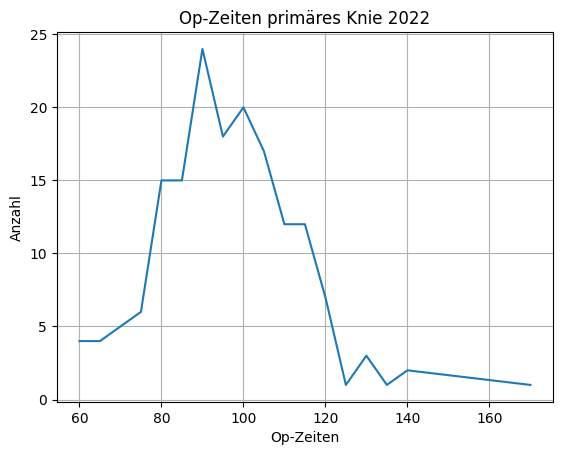

In [15]:
plot2 = opz.plot(kind='line', xlabel='Op-Zeiten', ylabel='Anzahl', grid=True,
                 title='Op-Zeiten primäres Knie 2022')
# plot2.bar_label(plot2.containers[0])
opz

In [16]:
knie_p.groupby('thrombose_embolie').size()

thrombose_embolie
False    167
dtype: int64

In [17]:
knie_p.groupby('sterblichkeit').size()

sterblichkeit
False    166
True       1
dtype: int64